### EXPONENTIAL SMOOTHING

In [1]:
import pandas as pd
import numpy as np

In [2]:
wsb_df = pd.read_csv('data/wsb.csv')

In [3]:
wsb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Month                  48 non-null     int64
 1   Sale Quantity          48 non-null     int64
 2   Promotion Expenses     48 non-null     int64
 3   Competition Promotion  48 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


### Visualize the SALE QUANTITY across months

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sn

In [6]:
%matplotlib inline

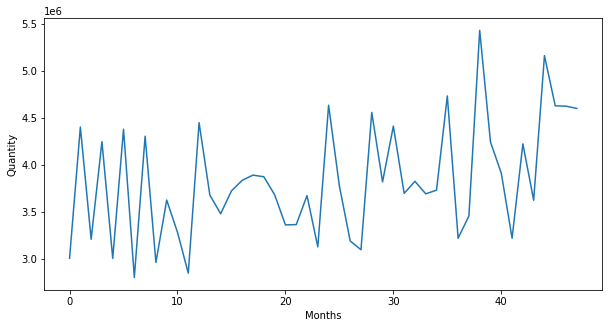

In [7]:
plt.figure(figsize=(10,5))
plt.xlabel("Months")
plt.ylabel("Quantity")
plt.plot(wsb_df['Sale Quantity'])

In [8]:
wsb_df['ewm'] = wsb_df['Sale Quantity'].ewm(alpha=0.2).mean()

In [9]:
wsb_df.head()

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,ewm
0,1,3002666,105,1,3.002666e+06
1,2,4401553,145,0,3.779825e+06
2,3,3205279,118,1,3.544356e+06
3,4,4245349,130,0,3.781819e+06
4,5,3001940,98,1,3.549823e+06


In [10]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [11]:
wsb_df['ewm'][36:]

36   3828234.64
37   3753219.93
38   4088961.93
39   4119543.81
40   4077607.99
41   3905359.34
42   3968692.78
43   3899157.24
44   4151776.99
45   4246860.31
46   4322279.35
47   4377698.31
Name: ewm, dtype: float64

In [12]:
# def get_mape(actual, predicted):
#     y_true, y_pred = np.array(actual), np.array(predicted)
#     return np.round(np.mean(np.abs((actual-predicted)/actual))*100,2)
    

def get_mape(actual, predicted):
    y_ture, y_pred = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((actual-predicted)/actual))*100,2)

In [13]:
get_mape(wsb_df['Sale Quantity'],wsb_df['ewm'])

9.66

In [14]:
from sklearn.metrics import mean_squared_error 

In [15]:
np.sqrt(mean_squared_error(wsb_df['Sale Quantity'][36:],wsb_df['ewm'][36:]))

593857.5336904248

No handles with labels found to put in legend.


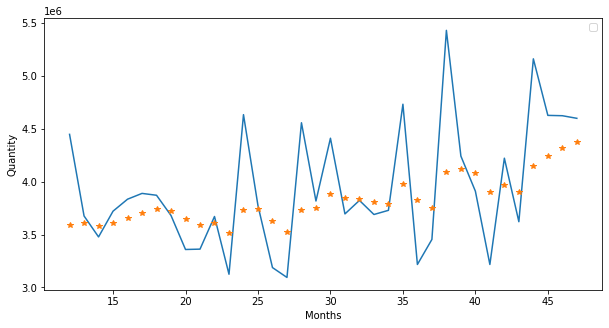

In [16]:
plt.figure(figsize=(10,5))
plt.xlabel('Months')
plt.ylabel('Quantity')
plt.plot(wsb_df['Sale Quantity'][12:])
plt.plot(wsb_df['ewm'][12:],'*')
plt.legend()